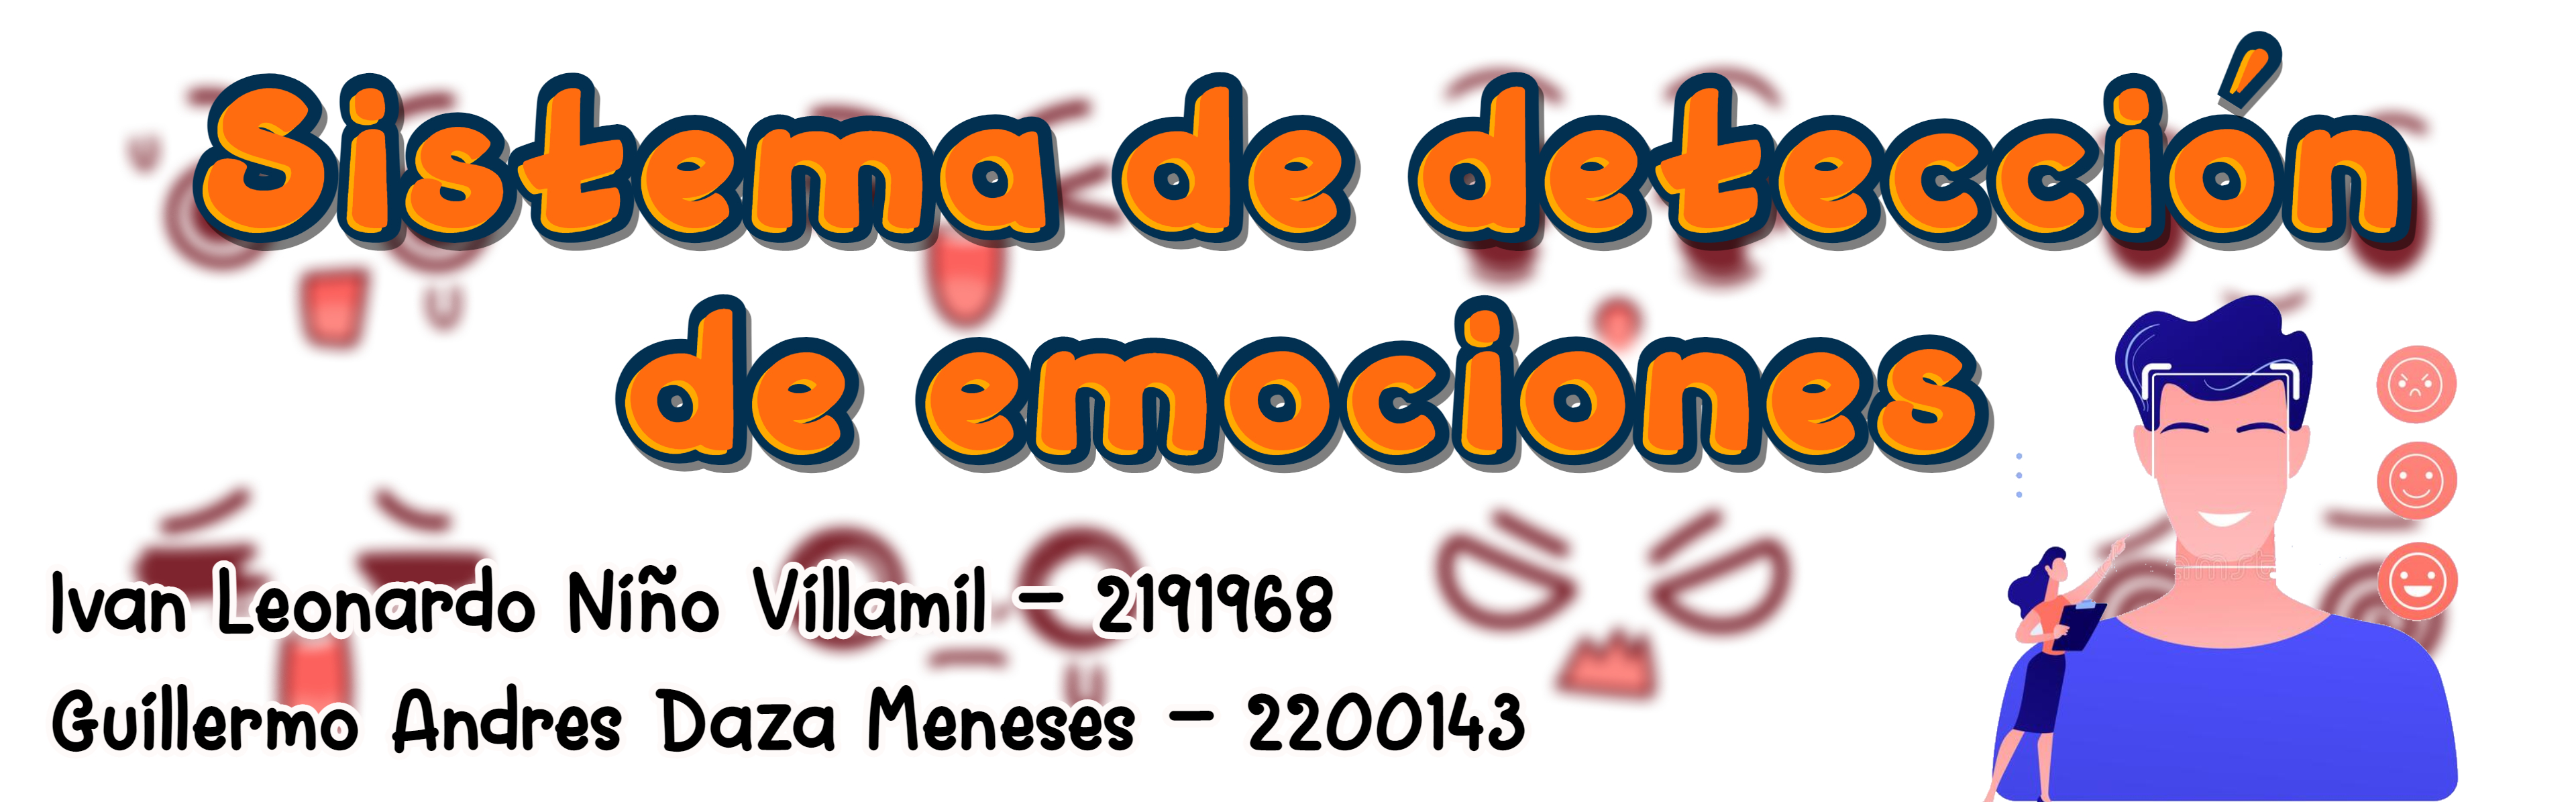

## Dataset y descripción:
Nombre:Face expression recognition dataset 

Link: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

Peso:126 mb

Contenido:

Contiene dos carpetas (train y validation) las cuales contiene siete sub carpetas con fotos de sus respectivas emociones (Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise)


Las fotos de las emociones se encuentran en diferentes ángulos además de ser fotos de caricaturas, personar reales y sacadas de películas

Cantidad de fotos por carpeta:


###Train: 28.821              
*   Angry:    3.993
*   Disgust:  436
*   Fear:     4.103
*   Happy:    7.164
*   Neutral:  4.982
*   Sad:      4.938
*   Surprise: 3.205

###Validation: 7.066
*   Angry:    960
*   Disgust:  111
*   Fear:     1.018
*   Happy:    1.825
*   Neutral:  1.216
*   Sad:      1.139
*   Surprise: 797





In [ ]:
#@title Librerias y montar el drive
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
import os
from skimage import io
from PIL import Image 
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title Clonar Repositorio y Descomprimir archivos

!git clone https://github.com/IvanLeonardoNino/Proyecto_IA


fatal: destination path 'Proyecto_IA' already exists and is not an empty directory.


In [ ]:
# Descomprimimos el dataset en la carpeta content
!unrar x -Y "/content/Proyecto_IA/images_New.rar" "/content/"
!unrar x -Y "/content/Proyecto_IA/images.rar" "/content/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  /content/images_New/train/sad/5571.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5572.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5573.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5574.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5575.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5576.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5577.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5578.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/5579.jpg                        85%  OK 
Extracting  /content/images_New/train/sad/558.jpg                         85%  OK 
Extracting  /

In [ ]:
#@title Definir las rutas del dataset 

folder = '/content/images_New/train'
folders_general = os.listdir("/content/images_New/train")
dir_train = '/content/images/train'
dir_val = '/content/images/validation'

print(folders_general)

['angry', 'fear', 'neutral', 'sad', 'surprise', 'disgust', 'happy']


In [ ]:
happy = sorted(os.listdir(folder + '/happy'))
angry = sorted(os.listdir(folder + '/angry'))
disgust = sorted(os.listdir(folder + '/disgust'))
sad = sorted(os.listdir(folder + '/sad'))
fear = sorted(os.listdir(folder + '/fear'))
neutral = sorted(os.listdir(folder + '/neutral'))
surprise = sorted(os.listdir(folder + '/surprise'))


print("cantidad de imágenes por tipo:")
print("Happy: ",len(happy))
print("Angry: ",len(angry))
print("Disgust: ",len(disgust))
print("Sad: ",len(sad))
print("Fear: ",len(fear))
print("Neutral: ",len(neutral))
print("Surprise: ",len(surprise))

cantidad de imágenes por tipo:
Happy:  8989
Angry:  4953
Disgust:  547
Sad:  6077
Fear:  5121
Neutral:  6198
Surprise:  4002


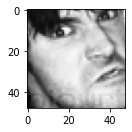

In [ ]:
image1=io.imread("/content/images_New/train/angry/1.jpg")
plt.figure()
plt.rcParams['image.cmap'] = 'gray'
plt.subplot(1,3,1)
plt.imshow(image1)

In [ ]:
#@title Guardar las imágenes en listas y agregar etiquetas

data = []
labels = []

#Happy label 0
for k in happy[:len(happy)//2]:
  img = cv2.imread(folder +'/happy/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(0)

#Angry label 1
for l in angry[:len(angry)//2]:
  img = cv2.imread(folder +'/angry/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(1)

#Disgust label 2
for i in disgust:
  img = cv2.imread(folder +'/disgust/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(2)

#Sad label 3
for l in sad[:len(sad)//2]:
  img = cv2.imread(folder +'/sad/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(3)

#Fear label 4
for i in fear[:len(fear)//2]:
  img = cv2.imread(folder +'/fear/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(4)

#neutral label 5
for l in neutral[:len(neutral)//2]:
  img = cv2.imread(folder +'/neutral/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(5)

#Surprise label 6
for i in surprise[:len(surprise)//2]:
  img = cv2.imread(folder +'/surprise/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(6)


In [ ]:
#@title Etiqueta asignada a cada expresión
Happy:    0
Angry:    1
Disgust:  2
Sad:      3
Fear:     4
Neutral:  5
Surprise: 6

In [ ]:
#@title Normalizar los datos
imagenes = np.array(data)
labels = np.array(labels)

imagenes = imagenes.astype(np.float32)
labels = labels.astype(np.int32)
imagenes = imagenes/255

In [ ]:
#@title Revolver los datos
n = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[n]
labels = labels[n]

In [ ]:
#@title Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(imagenes, labels, test_size = 0.2, random_state = 21)

### Probando los estimadores (GaussianNB, DecisionTreeClassifier, RandomForestClassifier, SVC)

In [ ]:
#@title GaussianNB
from sklearn.naive_bayes import GaussianNB
inicio = time.time()
estimador = GaussianNB()

estimador.fit(X,y)
y_pred = estimador.predict(X_test)
score = cross_val_score(estimador, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)
print(classification_report(y_test, y_pred))

accuracy score: 0.206 (+/- 0.01394)
24.073458671569824
              precision    recall  f1-score   support

           0       0.44      0.14      0.21       888
           1       0.16      0.04      0.07       512
           2       0.03      0.18      0.06        92
           3       0.25      0.39      0.30       609
           4       0.24      0.06      0.10       560
           5       0.26      0.17      0.21       587
           6       0.19      0.59      0.29       395

    accuracy                           0.21      3643
   macro avg       0.22      0.23      0.18      3643
weighted avg       0.27      0.21      0.19      3643



In [ ]:
#@title DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
inicio = time.time()
estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X, y)
y_pred = estimador.predict(X_test)
score = cross_val_score(estimador, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)
print(classification_report(y_test, y_pred))

accuracy score: 0.282 (+/- 0.00969)
3313.314398765564
              precision    recall  f1-score   support

           0       0.40      0.38      0.39       912
           1       0.19      0.20      0.19       491
           2       0.28      0.35      0.31       117
           3       0.23      0.24      0.24       576
           4       0.22      0.20      0.21       523
           5       0.28      0.28      0.28       624
           6       0.40      0.41      0.40       400

    accuracy                           0.29      3643
   macro avg       0.29      0.29      0.29      3643
weighted avg       0.29      0.29      0.29      3643



In [ ]:
#@title RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
inicio = time.time()
estimador = RandomForestClassifier()

estimador.fit(X, y)
y_pred = estimador.predict(X_test)
score = cross_val_score(estimador, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

fin = time.time()
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)
print(classification_report(y_test, y_pred))

accuracy score1 0.420 (+/- 0.01290)
1471.074490070343
              precision    recall  f1-score   support

           0       0.43      0.76      0.55       888
           1       0.43      0.18      0.25       512
           2       1.00      0.30      0.47        92
           3       0.32      0.32      0.32       609
           4       0.50      0.22      0.30       560
           5       0.37      0.38      0.37       587
           6       0.59      0.54      0.56       395

    accuracy                           0.43      3643
   macro avg       0.52      0.39      0.40      3643
weighted avg       0.44      0.43      0.40      3643



In [ ]:
#@title Support Vector Classifier(SVC)
from sklearn.svm import SVC
inicio = time.time()
kernels = ['linear', 'poly', 'rbf']
for i in kernels:
  print(i)
  estimador = SVC(kernel=i)
  estimador.fit(X, y)
  predicciones = estimador.predict(X_test)
  score = cross_val_score(estimador, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
  fin = time.time()
  print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
  print(classification_report(y_test, y_pred))
  print(""))
print(fin-inicio)


linear
accuracy score 0.275 (+/- 0.01894)
poly


## Por medio de redes neuronales

In [ ]:
#@title Preparar las imágenes

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dir_val,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
#@title Construir un modelo de red neuronal

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [ ]:
#@title Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nAlcanzado el 98% de acuracy, se detiene el modelo!")
            self.model.stop_training = True 

callbacks=myCallback()

In [ ]:
#@title Entrenar el modelo
history = model.fit(
    train_generator,
    batch_size =32,
    steps_per_epoch=100,
    epochs=300,
    validation_data=val_generator,
    validation_steps=50,
    callbacks = callbacks,
    verbose=1,
    shuffle=True
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/300
100/100 [==============================] - 5s 28ms/step - loss: 1.8316 - accuracy: 0.2362 - val_loss: 1.8316 - val_accuracy: 0.2250
Epoch 2/300
100/100 [==============================] - 2s 22ms/step - loss: 1.7874 - accuracy: 0.2678 - val_loss: 1.7791 - val_accuracy: 0.2675
Epoch 3/300
100/100 [==============================] - 2s 23ms/step - loss: 1.7391 - accuracy: 0.2881 - val_loss: 1.7007 - val_accuracy: 0.3206
Epoch 4/300
100/100 [==============================] - 2s 23ms/step - loss: 1.6590 - accuracy: 0.3365 - val_loss: 1.6332 - val_accuracy: 0.3613
Epoch 5/300
100/100 [==============================] - 3s 35ms/step - loss: 1.5736 - accuracy: 0.3942 - val_loss: 1.5693 - val_accuracy: 0.4025
Epoch 6/300
100/100 [==============================] - 3s 30ms/step - loss: 1.5490 - accuracy: 0.4047 - val_loss: 1.5555 - val_accuracy: 0.4144
Epoch 7/300
100/100 [==============================

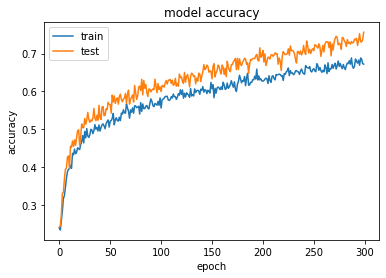

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

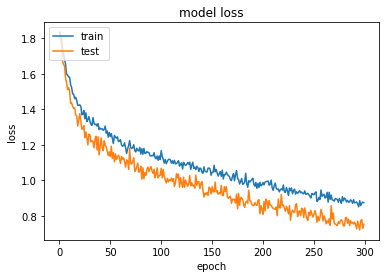

In [ ]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

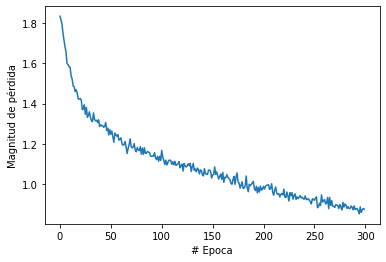

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

In [ ]:
#@title El mismo modelo de Redes neuronales con modificaciones en el ImageDataGenerator

# Crear un objeto ImageDataGenerator para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)

# Crear un objeto ImageDataGenerator para el conjunto de prueba
val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar los conjuntos de entrenamiento y validación
train_set = train_datagen.flow_from_directory(
    dir_train,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_set = val_datagen.flow_from_directory(
    dir_val,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Construir un modelo de red neuronal

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nAlcanzado el 98% de acuracy, se detiene el modelo!")
            self.model.stop_training = True 

callbacks=myCallback()

# Entrenar el modelo
inicio = time.time()
history = model.fit(
    train_set,
    batch_size =32,
    steps_per_epoch=100,
    epochs=300,
    validation_data=test_set,
    validation_steps=50,
    callbacks = callbacks,
    verbose=1,
    shuffle=True
)
fin = time.time()
print("Tiempo de ejecución:")
print(fin-inicio)

Epoch 1/300
100/100 [==============================] - 15s 141ms/step - loss: 1.8349 - accuracy: 0.2384 - val_loss: 1.8080 - val_accuracy: 0.2406
Epoch 2/300
100/100 [==============================] - 14s 139ms/step - loss: 1.8187 - accuracy: 0.2338 - val_loss: 1.7978 - val_accuracy: 0.2450
Epoch 3/300
100/100 [==============================] - 12s 119ms/step - loss: 1.7971 - accuracy: 0.2575 - val_loss: 1.7586 - val_accuracy: 0.2731
Epoch 4/300
100/100 [==============================] - 14s 143ms/step - loss: 1.7504 - accuracy: 0.2828 - val_loss: 1.6746 - val_accuracy: 0.3306
Epoch 5/300
100/100 [==============================] - 17s 168ms/step - loss: 1.7147 - accuracy: 0.3162 - val_loss: 1.6541 - val_accuracy: 0.3325
Epoch 6/300
100/100 [==============================] - 16s 156ms/step - loss: 1.6823 - accuracy: 0.3244 - val_loss: 1.6449 - val_accuracy: 0.3681
Epoch 7/300
100/100 [==============================] - 16s 158ms/step - loss: 1.6566 - accuracy: 0.3459 - val_loss: 1.5770 -